In [98]:
%load_ext autoreload
%autoreload 2
import wiki
import gensim.models as gm
import sklearn.metrics.pairwise as smp
import matplotlib.pyplot as plt
import numpy as np
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path_model = '/Users/harangju/Developer/data/wiki/models/'
fname = 'enwiki-20190801-pages-articles-multistream.xml-d2v-model-full'
model = gm.Doc2Vec.load(path_model + fname)

In [10]:
path_base = '/Users/harangju/Developer/data/wiki/'
name_xml = 'enwiki-20190801-pages-articles-multistream.xml.bz2'
name_index = 'enwiki-20190801-pages-articles-multistream-index.txt.bz2'
path_xml = path_base + name_xml
path_index = path_base + name_index
dump = wiki.Dump(path_xml, path_index)

In [11]:
pages = ['Atom', 'Chemistry']

In [18]:
pids = [dump.idx[page][1] for page in pages]
pvecs = [model.docvecs[pid] for pid in pids]
sim = smp.cosine_similarity(pvecs)
sim

array([[0.99999976, 0.0764624 ],
       [0.0764624 , 1.0000002 ]], dtype=float32)

In [19]:
topic = 'biochemistry'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'
network = wiki.Net()
network.load_graph(path_saved + topic + '.gexf')

In [93]:
%time corpus = wiki.Corpus(dump)

CPU times: user 438 ms, sys: 7.9 ms, total: 446 ms
Wall time: 445 ms


In [101]:
pvecs = np.zeros((len(network.graph.nodes), 300))
for i, page in enumerate(network.graph.nodes):
    sys.stdout.write("\ri = {}/{}".format(i+1, pvecs.shape[0]))
    sys.stdout.flush()
    try:
        idx = corpus.names.index(page)
    except ValueError as e:
        idx = None
    pvecs[i,:] = model.infer_vector(corpus[idx]) if idx else np.zeros((300,))

i = 901/902

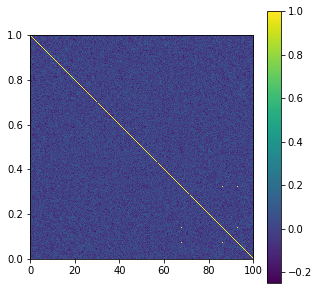

In [140]:
distmat = smp.cosine_distances(pvecs)
simmat = smp.cosine_similarity(pvecs)
plt.figure(figsize=(5,5))
plt.imshow(simmat, extent=[0,100,0,1], aspect=100)
plt.colorbar()

In [146]:
nodes = list(network.graph.nodes)
for n1, n2 in network.graph.edges:
    network.graph.edges[n1, n2]['weight'] = \
        distmat[nodes.index(n1), nodes.index(n2)]

In [83]:
model.estimate_memory()

{'doctag_lookup': 0,
 'doctag_syn0': 23480692800,
 'vocab': 1039983500,
 'vectors': 2495960400,
 'syn1neg': 2495960400,
 'total': 29512597100}

In [86]:
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model.estimate_memory()

{'doctag_lookup': 0,
 'doctag_syn0': 23480692800,
 'vocab': 1039983500,
 'vectors': 2495960400,
 'syn1neg': 2495960400,
 'total': 29512597100}